<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [147]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [148]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [137]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [138]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
############### TASK 2 ########################

In [14]:
#[1]Adding a BOXPLOT for Median values for occupied homes#

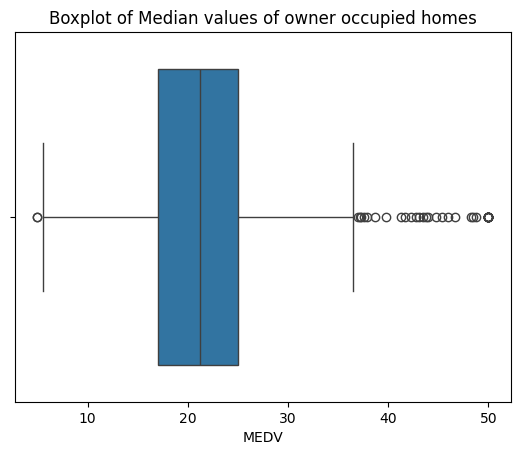

In [25]:
ax = sns.boxplot(x="MEDV", data=boston_df).set(title="Boxplot of Median values of owner occupied homes")

In [ ]:
# Min is around 5, Max is around 38 and the median value is around 21.5 #

In [ ]:
# [2] Bar plot for Charles river variable #

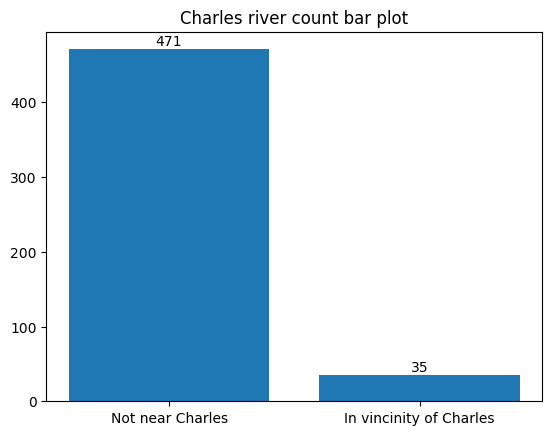

In [118]:
x=boston_df["CV"]
counts = boston_df["CV"].value_counts()
y=boston_df["CHAS"]
pyplot.bar(counts.index,counts.values)
pyplot.title("Charles river count bar plot")
for i, (category,value) in enumerate(zip(counts.index,counts.values)):
    pyplot.text(i, value + 1,f"{value}",ha='center',va='bottom')

In [99]:
pyplot.show()

In [ ]:
# There are 471 houses not close by to the Charles river whereas there are just 35 houses near by Charles river#

In [ ]:
#[3] Side by side box plot

[Text(0.5, 1.0, 'BOX plot of MEDV for 3 different age categories')]

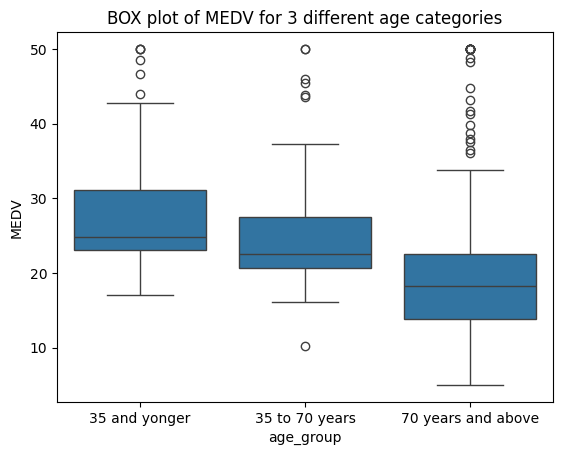

In [127]:
age_bins = [0,35,70,100]
age_groups = pd.cut(boston_df["AGE"], bins=age_bins, labels=["35 and yonger","35 to 70 years", "70 years and above"])
boston_df["age_group"] = age_groups

sns.boxplot(x=boston_df["age_group"],y=boston_df["MEDV"],data=boston_df).set(title="BOX plot of MEDV for 3 different age categories")

In [ ]:
# For the category 35 years and yonger the min is around 18 and max is 42 for median values and the meadian is around 24.
# For the category 35 to 70 the min is around 17 and max is 38 for median values and the meadian is around 23.
# For the category 70 and above the min is around 15 and max is 23 for median values and the meadian is around 19.

In [ ]:
#[4] Scatter plot betwwen Nitric oxide concentration and propotion of non-retail business acres

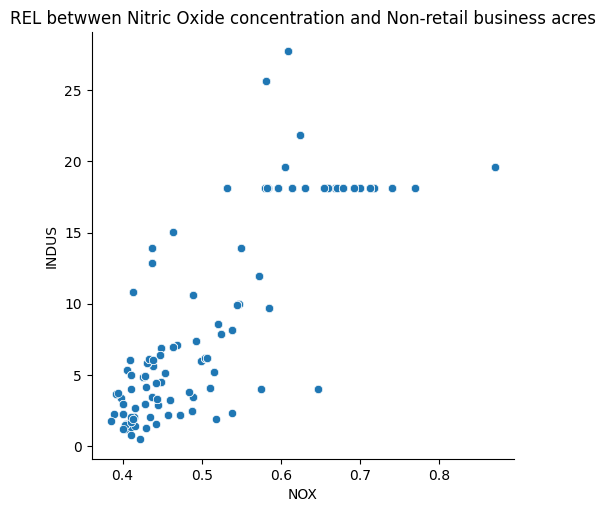

In [131]:
sns.relplot(data=boston_df, x=boston_df["NOX"], y=boston_df["INDUS"],hue=None).set(title="REL betwwen Nitric Oxide concentration and Non-retail business acres")

In [ ]:
# above shows the Nitric oxide concentration is low where the INDUS is low since the concentration is majorly on the lower end quadrant of the plot.

In [ ]:
#[5] Histogram plot of pupil to teacher ratio

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

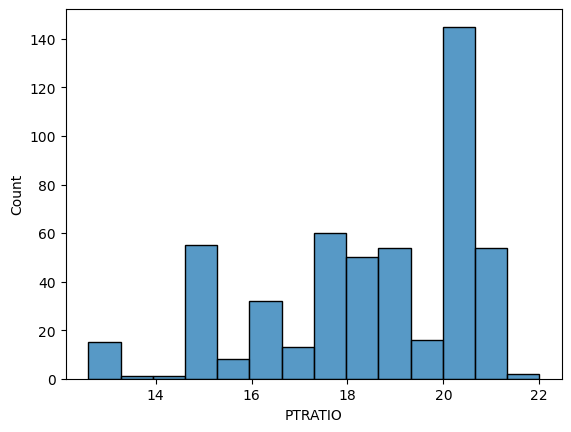

In [132]:
sns.histplot(boston_df["PTRATIO"])

In [ ]:
# the max average of PTRATIO is around 21 where most of the data item has this value. The question should have another column to compare to for better analysis but it only asks to plot the histogram of PTRATIO.

In [ ]:
###################### TASK 3 ########################

In [ ]:
#[1] Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [ ]:
# h0 = No significant difference between median values of houses near charles river
# ha = There is significant different between median values

In [139]:
t_stat, p_value = stats.ttest_ind(boston_df["MEDV"],boston_df["CHAS"])

In [140]:
print("p-value:", p_value)

p-value: 1.4651540072350996e-305


In [ ]:
# As the p-value is less than alpha (0.05) we can reject the null hypothesis and conclude that the alternative hypothesis is correct.

In [ ]:
#[2] Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [ ]:
# h0 = No significant difference between median values of houses built prior to age
# ha = There is significant different between median values

In [144]:
F_statistics, p_value = f_oneway(boston_df["AGE"],boston_df["MEDV"])

In [145]:
print(f"p-value: {p_value:.4f}")

p-value: 0.0000


In [ ]:
# As the p-value is less than alpha (0.05) we can reject the null hypothesis and conclude that the alternative hypothesis is correct.

In [ ]:
#[3] Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [ ]:
# h0 = No relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# ha = There is significant different between them

In [151]:
corelation_coefficient = boston_df["ZN"].corr(boston_df["NOX"])

In [152]:
print(corelation_coefficient)

-0.5166037078279836


In [ ]:
# As the p-value is less than alpha (0.05) we can reject the null hypothesis and conclude that the alternative hypothesis is correct.

In [ ]:
#[4] What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
# h0 = No impact on additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# ha = There is significant impact between them

In [153]:
x = boston_df["DIS"]
y = boston_df["MEDV"]

X = sm.add_constant(x)

model = sm.OLS(y,x).fit()

In [154]:
print(model.rsquared)

0.7321002561555994


In [ ]:
# As the p-value is more than alpha (0.05) we can reject the alternate hypothesis and conclude that the null hypothesis is correct.